# You've Got a FRED

In [33]:
import pandas as pd
import datetime
from pathlib import Path
%matplotlib inline

## Hodrick-Prescott filter analysis

### GDP Analysis

In [34]:
# Read the GDP csv data from FRED and set the column `DATE` as a datetime index
file_path = Path("../Resources/gdp_data.csv")
gdp = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
gdp.head()

,GDP
DATE,
2004-01-01,11920.169
2004-04-01,12108.987
2004-07-01,12303.340
2004-10-01,12522.425
2005-01-01,12761.337


<AxesSubplot:xlabel='DATE'>

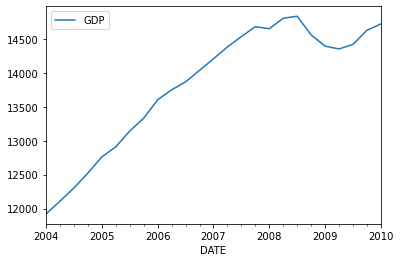

In [35]:
# Plot the raw GDP data as a line plot
gdp.plot()

In [50]:
# Use the `hpfilter` function to decompose the GDP column into the trend and noise components.
import statsmodels.api as sm
gdp_noise, gdp_trend = sm.tsa.filters.hpfilter(gdp['GDP'])

<AxesSubplot:xlabel='DATE'>

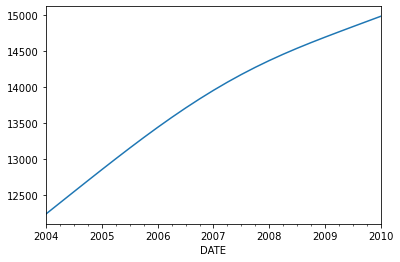

In [52]:
# Plot the GDP trend data as a line plot
gdp_trend.plot()

<AxesSubplot:xlabel='DATE'>

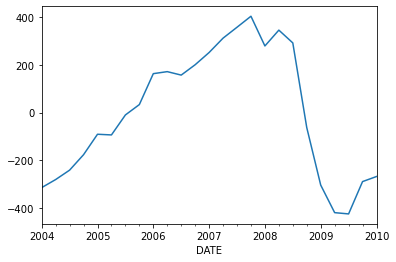

In [53]:
# Plot the GDP noise data as a line plot
gdp_noise.plot()

---

### Inflation

In [39]:
# Read the Inflation csv data from FRED and set the column `DATE` as a datetime index
# Note: Inflation, as measured by consumer price index in urban areas
file_path = Path("../Resources/inflation_data.csv")
inflation = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
inflation.head()

,CPIAUCNS
DATE,
2004-01-01,185.2
2004-02-01,186.2
2004-03-01,187.4
2004-04-01,188.0
2004-05-01,189.1


<AxesSubplot:xlabel='DATE'>

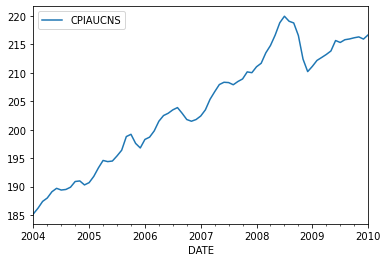

In [40]:
# Plot the raw inflation data as a line plot
inflation.plot()

In [41]:
# Use the `hpfilter` function to decompose the `CPIAUCNS` column into the trend and noise components.
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(inflation['CPIAUCNS'])

<AxesSubplot:xlabel='DATE'>

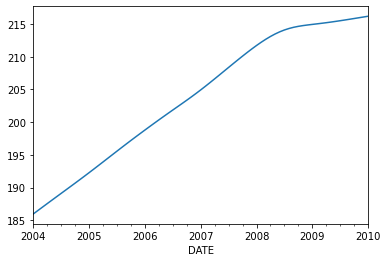

In [42]:
# Plot the inflation trend data as a line plot
ts_trend.plot()

<AxesSubplot:xlabel='DATE'>

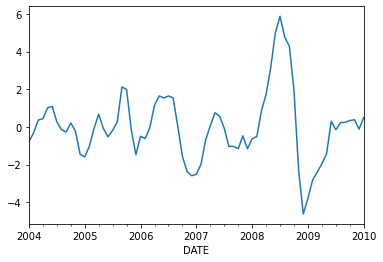

In [43]:
# Plot the inflation noise data as a line plot
ts_noise.plot()

<AxesSubplot:xlabel='DATE'>

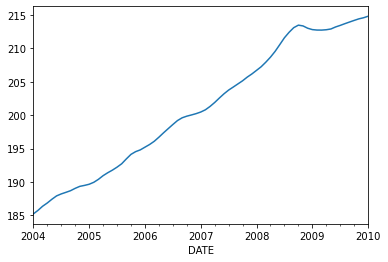

In [54]:
# Plot the exponentially-weighted moving average for the inflation data
inflation.CPIAUCNS.ewm(halflife=6).mean().plot()

---

### Job Data

In [22]:
# Read the job count csv data from FRED and set the column `DATE` as a datetime index
# Note: This is the total number of non-farm payrolls
file_path = Path("../Resources/job_roll_data.csv")
job_roll = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
job_roll.head()

,PAYEMS
DATE,
2004-01-01,130787
2004-02-01,130844
2004-03-01,131156
2004-04-01,131426
2004-05-01,131710


<AxesSubplot:xlabel='DATE'>

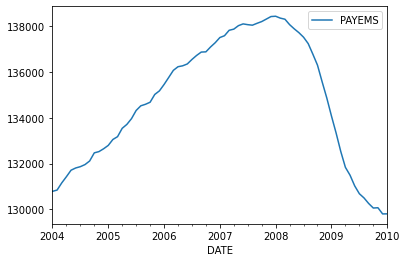

In [23]:
# Plot the raw job data as a line plot
job_roll.plot()

In [24]:
# Use the `hpfilter` function to decompose the `PAYEMS` column into the trend and noise components.
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(job_roll['PAYEMS'])

<AxesSubplot:xlabel='DATE'>

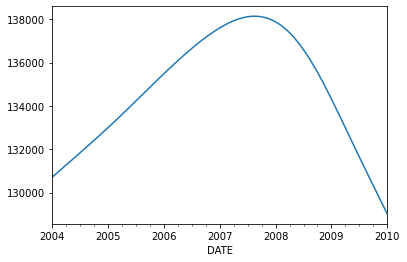

In [26]:
# Plot the job trend data as a line plot
ts_trend.plot()

<AxesSubplot:xlabel='DATE'>

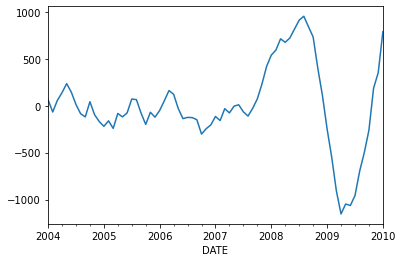

In [27]:
# Plot the job noise data as a line plot
ts_noise.plot()

<AxesSubplot:xlabel='DATE'>

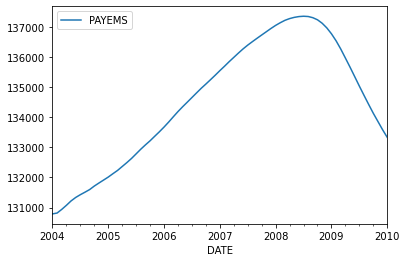

In [49]:
# Plot the exponentially-weighted moving average for the job data
job_roll.ewm(halflife=10).mean().plot()